In [1]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# let's print the shape of the dataset


11490434/11490434 [==============================] - 3s 0us/step


In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical


In [12]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [16]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [17]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [18]:
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))

In [20]:
from tensorflow.keras.layers import Flatten
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [21]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [22]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10


469/469 [==============================] - 46s 92ms/step - loss: 0.1937 - accuracy: 0.9432 - val_loss: 0.0740 - val_accuracy: 0.9763
Epoch 2/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0573 - accuracy: 0.9830 - val_loss: 0.0573 - val_accuracy: 0.9811
Epoch 3/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.0533 - val_accuracy: 0.9830
Epoch 4/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0526 - val_accuracy: 0.9817
Epoch 5/10
469/469 [==============================] - 54s 115ms/step - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.0541 - val_accuracy: 0.9832
Epoch 6/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0531 - val_accuracy: 0.9834
Epoch 7/10
469/469 [==============================] - 55s 116ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0556 - val_accur

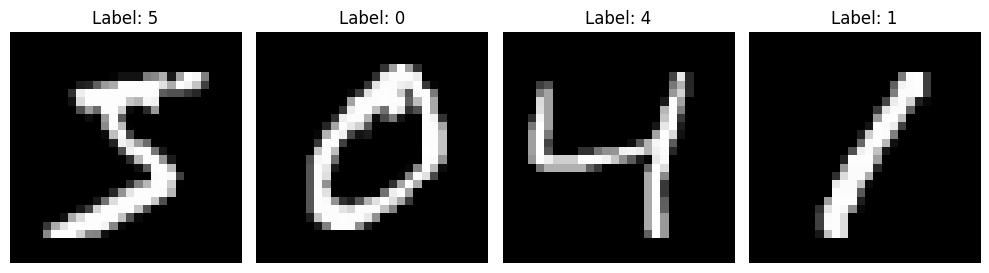

In [23]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()